In [1]:
from scipy.io import loadmat
from scipy.interpolate import RegularGridInterpolator
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import xarray as xr
import numpy.ma as ma
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import cmoocean as cmo
import warnings
from wim_dateTime import createListDateTime
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.colors import ListedColormap
import os
import glob
from matplotlib.gridspec import GridSpec


def convertEgg2Num_FSD(fsd_egg):
    
    #Remove unknown ice free, unknown, and land
    sic_num=fsd_egg.where(fsd_egg<99).values
    sic_num[sic_num==22]=1.65
    sic_num[sic_num==1]=1
    sic_num[sic_num==2]=10
    sic_num[sic_num==3]=60
    sic_num[sic_num==4]=300
    sic_num[sic_num==5]=1250
    sic_num[sic_num==6]=6000
    sic_num[sic_num==7]=15000
    sic_num[sic_num==8]=np.nan
    sic_num[sic_num==9]=0
    sic_num[sic_num==10]=0
    sic_num[sic_num==21]=15000
    return sic_num.astype(float)


def convertEgg2Num_SIC(sic_egg):
    
    #Remove unknown ice free, unknown, and land
    sic_num=sic_egg.values #.where(sic_egg<99).values
    sic_num[sic_num==92]=10
    sic_num[sic_num==91]=9.5
    sic_num[sic_num==90]=9
    sic_num[sic_num==89]=8.5
    sic_num[sic_num==81]=9
    sic_num[sic_num==80]=8
    sic_num[sic_num==79]=8
    sic_num[sic_num==78]=7.5
    sic_num[sic_num==70]=7
    sic_num[sic_num==68]=7
    sic_num[sic_num==67]=6.5
    sic_num[sic_num==57]=6
    sic_num[sic_num==56]=5.5
    sic_num[sic_num==46]=5
    sic_num[sic_num==45]=4.5
    sic_num[sic_num==35]=4
    sic_num[sic_num==34]=3.5
    sic_num[sic_num==24]=3
    sic_num[sic_num==23]=2.5
    sic_num[sic_num==13]=2
    sic_num[sic_num==12]=1.5
    sic_num[sic_num==60]=6
    sic_num[sic_num==50]=5
    sic_num[sic_num==40]=4
    sic_num[sic_num==30]=3
    sic_num[sic_num==20]=2
    sic_num[sic_num==10]=1
    sic_num[sic_num==98]=0
    sic_num[sic_num==2]=0.1
    sic_num[sic_num==1]=0.1
    sic_num[sic_num<=0]=0

    return sic_num.astype(float)/10


def convertEgg2Num_ITD(sic_egg):
    
    #Remove unknown ice free, unknown, and land
    sic_num=sic_egg.where(sic_egg<99).values
    sic_num[sic_num==80]=0
    sic_num[sic_num==90]=np.nan
    sic_num[sic_num==92]=np.nan
    sic_num[sic_num==98]=0
    sic_num[sic_num==81]=5
    sic_num[sic_num==82]=5
    sic_num[sic_num==83]=20
    sic_num[sic_num==84]=12.5
    sic_num[sic_num==85]=22.5
    sic_num[sic_num==87]=50
    sic_num[sic_num==88]=40
    sic_num[sic_num==89]=60
    sic_num[sic_num==91]=95
    sic_num[sic_num==93]=200
    sic_num[sic_num==94]=150
    sic_num[sic_num==95]=300
    sic_num[sic_num==96]=250
    sic_num[sic_num==97]=350
    
    return sic_num.astype(float)


def readCryoSatFiles(list_file_N7, list_file_C2):
    #Nimbus-7000 stuff
    listN7=[]
    listC2=[]
    stdN7=[]
    stdC2=[]
    indexF=0
    for file_N7 in list_file_N7:
        fileC2=list_file_C2[indexF]
        dx_obs_fsd=np.squeeze(xr.open_dataset(fileC2))
        dx_obs=np.squeeze(xr.open_dataset(file_N7))
        tempN7=np.squeeze(dx_obs.F17_ICECON) 
        listN7.append(tempN7)
        tempC2=np.squeeze(dx_obs_fsd.fsdrad)*2
        listC2.append(tempC2)
        
#         mask_1 = np.logical_or(tempN7.values > 1, tempN7.values < 0.15)
#         mask_3 = np.logical_or(tempN7.values > 1, tempN7.values > 0.8)
#         mask_4 = np.logical_or(tempN7.values > 1, tempN7.values > 0.9)
#         mask_2 = np.logical_or(tempC2>300, tempC2==300)   
    
#         area_fsd_y = ma.masked_array(dx_NSIDC.values, mask=mask_1+mask_2+mask_lab+mask_lab2)
#         area_aice_y = ma.masked_array(dx_NSIDC.values, mask=mask_1+mask_3+mask_lab+mask_lab2)
        
#         stdN7.append(np.sum(np.sum(area_aice_y, axis=0))/1e12)
#         stdC2.append(np.sum(np.sum(area_fsd_y, axis=0))/1e12)
        
#         indexF=indexF+1

#     std_aice=np.nanstd(np.array(stdN7))
#     std_fsd=np.nanstd(np.array(stdC2))
# #     MIZ_aice_obs=np.nanmean(np.array(stdN7))
# #     MIZ_fsd_obs=np.nanmean(np.array(stdC2))
    avg_aice_obs=np.nanmean(np.stack(listN7),axis=0)
    avg_fsd_obs=np.nanmean(np.stack(listC2),axis=0)
    return [avg_aice_obs, avg_fsd_obs]

def computeMIZ_C2(tempN7, tempC2):
    
    grid_NSIDC='/storage/bward/obs/nsidc/NSIDC0771_CellArea_PS_N25km_v1.0.nc'
    dx_NSIDC=xr.open_dataset(grid_NSIDC)
    dx_NSIDC=dx_NSIDC.cell_area
    coord_obs="/storage/bward/obs/nsidc/NSIDC0771_LatLon_PS_N25km_v1.0.nc"
    dx_coord_obs=xr.open_dataset(coord_obs)
    lat_obs=dx_coord_obs.latitude
    lon_obs=dx_coord_obs.longitude
    # mask_lab= np.logical_or(lon_obs<=-75, lon_obs>=-43)
    # mask_lab2= np.logical_or(lat_obs<=45, lat_obs>=72)
    mask_lab= np.logical_or(lon_obs<=-65, lon_obs>=-43)
    mask_lab2= np.logical_or(lat_obs<=45, lat_obs>=72)

    mask_1 = np.logical_or(tempN7 > 1, tempN7 < 0.15)
    mask_3 = np.logical_or(tempN7 > 1, tempN7 > 0.8)
    mask_4 = np.logical_or(tempN7 > 1, tempN7 > 0.9)
    mask_2 = np.logical_or(tempC2>300, tempC2==300)   

    area_fsd_y = ma.masked_array(dx_NSIDC.values, mask=mask_1+mask_2+mask_3+mask_lab+mask_lab2)
    area_aice_y = ma.masked_array(dx_NSIDC.values, mask=mask_1+mask_3+mask_lab+mask_lab2)
    
    if np.isnan(tempC2).all():
        cMIZ=np.sum(np.sum(area_aice_y, axis=0))/1e12
        dMIZ=np.nan
    else:
        cMIZ=np.sum(np.sum(area_aice_y, axis=0))/1e12
        dMIZ=np.sum(np.sum(area_fsd_y, axis=0))/1e12
    
    return [cMIZ, dMIZ]

def readIceChartFiles(list_files):
    
    grid_IC='/storage/bward/obs/iceChart/depot.cmc.ec.gc.ca/upload/mrb/caya/area.nc'
    dx_IC=xr.open_dataset(grid_IC)
    dx_IC=dx_IC.AREA
    lat_IC=dx_IC.lat
    lon_IC=dx_IC.lon
    mask_labIC=np.logical_or(lon_IC<=-65, lon_IC>=-43)
    mask_lab2IC=np.logical_or(lat_IC<=45, lat_IC>=72)
    
    listFA=[]
    listFB=[]
    listFC=[]

    listSA=[]
    listSB=[]
    listSC=[]

    listCA=[]
    listCB=[]
    listCC=[]
    listCT=[]

    for file_IC in list_files:
#         print(file_IC)
        ds_temp=xr.open_dataset(file_IC)

        temp_FA=convertEgg2Num_FSD(np.squeeze(ds_temp.FA))
        temp_FB=convertEgg2Num_FSD(np.squeeze(ds_temp.FB))
        temp_FC=convertEgg2Num_FSD(np.squeeze(ds_temp.FC))
        temp_SA=convertEgg2Num_ITD(np.squeeze(ds_temp.SA))
        temp_SB=convertEgg2Num_ITD(np.squeeze(ds_temp.SB))
        temp_SC=convertEgg2Num_ITD(np.squeeze(ds_temp.SC))
        temp_CA=convertEgg2Num_SIC(np.squeeze(ds_temp.CA))
        temp_CB=convertEgg2Num_SIC(np.squeeze(ds_temp.CB))
        temp_CC=convertEgg2Num_SIC(np.squeeze(ds_temp.CC))
        temp_CT=convertEgg2Num_SIC(np.squeeze(ds_temp.CT))

        listFA.append(temp_FA)
        listFB.append(temp_FB)
        listFC.append(temp_FC)
        listSA.append(temp_SA)
        listSB.append(temp_SB)
        listSC.append(temp_SC)
        listCA.append(temp_CA)
        listCB.append(temp_CB)
        listCC.append(temp_CC)
        listCT.append(temp_CT)
           
    FSDA=np.nanmean(np.stack(listFA),axis=0)
    FSDB=np.nanmean(np.stack(listFB),axis=0)
    FSDC=np.nanmean(np.stack(listFC),axis=0)

    ITDA=np.nanmean(np.stack(listSA),axis=0)
    ITDB=np.nanmean(np.stack(listSB),axis=0)
    ITDC=np.nanmean(np.stack(listSC),axis=0)

    SICA=np.nanmean(np.stack(listCA),axis=0)
    SICB=np.nanmean(np.stack(listCB),axis=0)
    SICC=np.nanmean(np.stack(listCC),axis=0)
    SICT=np.nanmean(np.stack(listCT),axis=0)

    SIC=SICA+SICB+SICC
    SIC[SIC<=0]=np.nan

    SICT[SICT<=0.15]=np.nan

    FSD=(SICA/SIC)*FSDA+(SICB/SIC)*FSDB+(SICC/SIC)*FSDC
    
    return [SICT, FSD]

def computeMIZ_IC(temp_CT, temp_FSD):
    
    grid_IC='/storage/bward/obs/iceChart/depot.cmc.ec.gc.ca/upload/mrb/caya/area.nc'
    dx_IC=xr.open_dataset(grid_IC)
    dx_IC=dx_IC.AREA
    lat_IC=dx_IC.lat
    lon_IC=dx_IC.lon
    mask_labIC=np.logical_or(lon_IC<=-65, lon_IC>=-43)
    mask_lab2IC=np.logical_or(lat_IC<=45, lat_IC>=72)
    
    mask_IC1 = np.logical_or(np.isnan(temp_CT), temp_CT<0.15)
    mask_IC2 = np.logical_or(temp_FSD<0, temp_FSD>300)
    mask_IC3 = np.logical_or(temp_CT>1, temp_CT>0.8)
    mask_IC4 = np.logical_or(temp_CT>1, temp_CT>0.9)
#         mask_IC5 = np.logical_or(temp_CT<0, FSD<-10)

    area_fsd_y = ma.masked_array(dx_IC.values, mask=mask_IC1+mask_IC2+mask_IC3+mask_labIC+mask_lab2IC+mask_IC4)
    area_aice_y = ma.masked_array(dx_IC.values, mask=mask_IC1+mask_IC3+mask_labIC+mask_lab2IC)
    
    cMIZ=np.sum(np.sum(area_aice_y, axis=0))/1e6
    dMIZ=np.sum(np.sum(area_fsd_y, axis=0))/1e6
    
    return [cMIZ, dMIZ]

def computeAvgCryoSatIceChart(list_year, list_month):
    globAvg_aiceIC=[]
    globAvg_fsdIC=[]
    globAvg_aiceC2=[]
    globAvg_fsdC2=[]
    
    for mm in list_month:
        if mm != 12:
            nameFile='iceh_avg.2018'+str(mm).zfill(2)+'0100000-2018'+str(mm+1).zfill(2)+'0100000.nc'
        else:
            nameFile='iceh_avg.2018'+str(mm).zfill(2)+'0100000-2019010100000.nc'

        avg_dMIZ_IC_y=np.array([])
        avg_cMIZ_IC_y=np.array([])
        avg_dMIZ_C2_y=np.array([])
        avg_cMIZ_C2_y=np.array([])
        
#         #Create a list of file to read for each obs dataset
        for yyyy in list_year:
            list_file_IC=[]
            list_file_N7=[]
            list_file_C2=[]
            file_pattern_N7="NSIDC0051_SEAICE_PS_N25km_"+str(yyyy)+str(mm).zfill(2)+"_v2.0.nc"
            filePath_N7=os.path.join(path_obs, file_pattern_N7)
            tempFileN7=glob.glob(filePath_N7)

            file_pattern_C2="cryosat_fsd_"+str(yyyy)+str(mm).zfill(2)+"_nsidc.nc"
            filePath_C2=os.path.join(path_obs_fsd, file_pattern_C2)
            tempFileC2=glob.glob(filePath_C2)

            file_pattern_IC='CIS_10km_'+str(yyyy)+str(mm).zfill(2)+'*'+'.nc'
            filePath_IC=os.path.join(path_IC, file_pattern_IC)
            tempFileL=glob.glob(filePath_IC)

            for f in tempFileL:
                list_file_IC.append(f)

            for fN7 in tempFileN7:
                list_file_N7.append(fN7)

            for fC2 in tempFileC2:
                list_file_C2.append(fC2)
                
            #Read obs, and compute MIZ each year
            [mean_aice_IC,mean_fsd_IC]=readIceChartFiles(list_file_IC)
#             [cMIZ_IC_y, dMIZ_IC_y]=computeMIZ_IC(mean_aice_IC, mean_fsd_IC)
            
            [mean_aice_C2,mean_fsd_C2]=readCryoSatFiles(list_file_N7, list_file_C2)
        
            globAvg_aiceIC.append(mean_aice_IC)
            globAvg_fsdIC.append(mean_fsd_IC)
            globAvg_aiceC2.append(mean_aice_C2)
            globAvg_fsdC2.append(mean_fsd_C2)
            
    sic_IC=np.nanmean(np.stack(globAvg_aiceIC),axis=0)
    fsd_IC=np.nanmean(np.stack(globAvg_fsdIC),axis=0)
    sic_C2=np.nan_to_num(np.nanmean(np.stack(globAvg_aiceC2),axis=0))
    fsd_C2=np.nan_to_num(np.nanmean(np.stack(globAvg_fsdC2),axis=0))
    
    return [sic_IC, fsd_IC, sic_C2, fsd_C2]

In [2]:
REP_coup='/aos/home/bward/wim/post-proc/case83/avg/'
REP_IC2='/aos/home/bward/wim/post-proc/case89/avg/'
path_obs="/storage/bward/obs/nsidc/raw/"
path_obs_fsd='/storage/bward/obs/cryoSat2/nsidc/'
path_IC='/storage/bward/obs/iceChart/CIS_10km/'
monthsl=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

grid_NSIDC='/storage/bward/obs/nsidc/NSIDC0771_CellArea_PS_N25km_v1.0.nc'
dx_NSIDC=xr.open_dataset(grid_NSIDC)
dx_NSIDC=dx_NSIDC.cell_area
coord_obs="/storage/bward/obs/nsidc/NSIDC0771_LatLon_PS_N25km_v1.0.nc"
dx_coord_obs=xr.open_dataset(coord_obs)
lat_obs=dx_coord_obs.latitude
lon_obs=dx_coord_obs.longitude

cmap=cmo.matter()
bounds = [0, 10, 30, 60, 100, 200, 300, 400, 600, 900, 1200, 1500, 2000]
norm= mpl.colors.BoundaryNorm(bounds, cmap.N)

bounds_obs = [x*10 for x in bounds]
norm_obs = mpl.colors.BoundaryNorm(bounds_obs, cmap.N) 


grid_IC='/storage/bward/obs/iceChart/depot.cmc.ec.gc.ca/upload/mrb/caya/area.nc'
dx_IC=xr.open_dataset(grid_IC)
lat_IC=dx_IC.lat
lon_IC=dx_IC.lon

# monthsl=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

file_area='/aos/home/bward/wim/cice/out/case74/history/iceh_ic.2005-01-09-43200.nc'
dx_area = xr.open_dataset(file_area)
dx_area= dx_area.tarea

list_month=[1,2,3,4]
list_year=[2011,2012,2013,2014,2015,2016,2017,2018]
ntotal=len(list_month)*len(list_year)

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)  
    
    cMIZdMIZ_freq=np.zeros((lon_IC.shape[0],lon_IC.shape[1]))
    cMIZndMIZ_freq=np.zeros((lon_IC.shape[0],lon_IC.shape[1]))
    ncMIZdMIZ_freq=np.zeros((lon_IC.shape[0],lon_IC.shape[1]))
    ncMIZndMIZ_freq=np.zeros((lon_IC.shape[0],lon_IC.shape[1]))
    C2_cMIZdMIZ_freq=np.zeros((lon_obs.shape[0],lon_obs.shape[1]))
    C2_cMIZndMIZ_freq=np.zeros((lon_obs.shape[0],lon_obs.shape[1]))
    C2_ncMIZdMIZ_freq=np.zeros((lon_obs.shape[0],lon_obs.shape[1]))
    C2_ncMIZndMIZ_freq=np.zeros((lon_obs.shape[0],lon_obs.shape[1]))
    
    for yyyy in list_year:
        for mm in list_month:
            l_year=[yyyy]
            l_month=[mm]
            [sic_IC, fsd_IC, sic_C2, fsd_C2]=computeAvgCryoSatIceChart(l_year, l_month)
            
            #-------------------------CIS datas---------------------#
            mask1 = np.logical_or(np.isnan(fsd_IC), sic_IC<0.15)
            maskdMIZ = np.logical_or(fsd_IC<0, fsd_IC>300)
            maskndMIZ=np.logical_or(fsd_IC<300, fsd_IC==300)
            maskcMIZ = np.logical_or(np.isnan(sic_IC), sic_IC>0.8)
            maskcMIZ2 = np.logical_or(sic_IC<0.15, sic_IC>0.8)
            maskncMIZ = np.logical_or(np.isnan(fsd_IC), np.logical_or(sic_IC<=0.8, np.isnan(sic_IC)))
            
            mask_SLIC = np.logical_and.reduce((
                lon_IC >= -75,
                lon_IC <= -57,
                lat_IC >= 45,
                lat_IC <= 51
            ))

            mask_lab = np.logical_or.reduce((
                lon_IC <= -65,
                lon_IC >= -43,
                lat_IC <= 45,
                lat_IC >= 72
            ))

            FSD_cMIZdMIZ = ma.masked_array(fsd_IC, mask=maskcMIZ2+maskdMIZ+mask_SLIC) #+mask_lab)
            FSD_cMIZndMIZ = ma.masked_array(fsd_IC, mask=mask1+maskcMIZ+maskndMIZ+mask_SLIC)#+mask_lab)
            FSD_ncMIZndMIZ= ma.masked_array(fsd_IC, mask=maskncMIZ+maskndMIZ+mask_SLIC)#+mask_lab)
            FSD_ncMIZdMIZ = ma.masked_array(fsd_IC, mask=maskncMIZ+maskdMIZ+mask_SLIC)#+mask_lab)

            cMIZdMIZ_temp=ma.masked_array(np.ones((lon_IC.shape[0],lon_IC.shape[1])), mask=mask1+maskcMIZ2+maskdMIZ).filled(0) #+mask_SLIC).filled(0)#+mask_lab).filled(0)
            cMIZndMIZ_temp=ma.masked_array(np.ones((lon_IC.shape[0],lon_IC.shape[1])),mask=mask1+maskcMIZ+maskndMIZ).filled(0) #+mask_SLIC).filled(0)
            ncMIZdMIZ_temp=ma.masked_array(np.ones((lon_IC.shape[0],lon_IC.shape[1])),mask=maskncMIZ+maskndMIZ).filled(0)#+mask_SLIC).filled(0)#+mask_lab).filled(0)
            ncMIZndMIZ_temp=ma.masked_array(np.ones((lon_IC.shape[0],lon_IC.shape[1])), mask=maskncMIZ+maskdMIZ).filled(0)#+mask_SLIC).filled(0)#+mask_lab).filled(0)

            cMIZdMIZ_freq=cMIZdMIZ_freq+cMIZdMIZ_temp
            cMIZndMIZ_freq=cMIZndMIZ_freq+cMIZndMIZ_temp
            ncMIZdMIZ_freq=ncMIZdMIZ_freq+ncMIZdMIZ_temp
            ncMIZndMIZ_freq=ncMIZndMIZ_freq+ncMIZndMIZ_temp
            
            
            #-------------------------CryoSat-2 datas---------------------#
            C2mask_1 = np.logical_or(sic_C2 > 1, sic_C2 < 0.15)
            C2mask_cMIZ = np.logical_or(np.isnan(sic_C2),sic_C2 > 0.8)
            C2mask_dMIZ = np.logical_or(fsd_C2>300, np.isnan(fsd_C2))
            C2mask_ncMIZ = np.logical_or(np.isnan(sic_C2),sic_C2 <= 0.8)
            C2mask_ndMIZ = np.logical_or(np.isnan(fsd_C2), fsd_C2<=300)
            
            C2mask_SL = np.logical_and.reduce((
            lon_obs >= -75,
            lon_obs <= -57,
            lat_obs >= 45,
            lat_obs <= 51
            ))

            C2mask_lab = np.logical_or.reduce((
            lon_obs <= -65,
            lon_obs >= -43,
            lat_obs <= 45,
            lat_obs >= 72
            ))


            C2_cMIZdMIZ_temp=ma.masked_array(np.ones((lon_obs.shape[0],lon_obs.shape[1])), mask=C2mask_1+C2mask_cMIZ+C2mask_dMIZ).filled(0)#+C2mask_SL).filled(0)#+C2mask_lab).filled(0)
            C2_cMIZndMIZ_temp=ma.masked_array(np.ones((lon_obs.shape[0],lon_obs.shape[1])),mask=C2mask_1+C2mask_cMIZ+C2mask_ndMIZ).filled(0)#+C2mask_SL).filled(0)#+C2mask_lab).filled(0)
            C2_ncMIZdMIZ_temp=ma.masked_array(np.ones((lon_obs.shape[0],lon_obs.shape[1])),mask=C2mask_ncMIZ+C2mask_ndMIZ).filled(0)#+C2mask_SL).filled(0)#+C2mask_lab).filled(0)
            C2_ncMIZndMIZ_temp=ma.masked_array(np.ones((lon_obs.shape[0],lon_obs.shape[1])), mask=C2mask_ncMIZ+C2mask_dMIZ).filled(0)#+C2mask_SL).filled(0)#+C2mask_lab).filled(0)

            C2_cMIZdMIZ_freq=C2_cMIZdMIZ_freq+C2_cMIZdMIZ_temp
            C2_cMIZndMIZ_freq=C2_cMIZndMIZ_freq+C2_cMIZndMIZ_temp
            C2_ncMIZdMIZ_freq=C2_ncMIZdMIZ_freq+C2_ncMIZdMIZ_temp
            C2_ncMIZndMIZ_freq=C2_ncMIZndMIZ_freq+C2_ncMIZndMIZ_temp

#CIS
ncMIZndMIZ_freq[ncMIZndMIZ_freq == 0]=np.nan
cMIZdMIZ_freq[cMIZdMIZ_freq == 0]= np.nan
ncMIZdMIZ_freq[ncMIZdMIZ_freq == 0]= np.nan
cMIZndMIZ_freq[cMIZndMIZ_freq == 0]= np.nan
ncMIZndMIZ_frac=(ncMIZndMIZ_freq/ntotal)*100
cMIZdMIZ_frac=(cMIZdMIZ_freq/ntotal)*100
ncMIZdMIZ_frac=(ncMIZdMIZ_freq/ntotal)*100
cMIZndMIZ_frac=(cMIZndMIZ_freq/ntotal)*100

#CryoSat-2
C2_ncMIZndMIZ_freq[C2_ncMIZndMIZ_freq == 0]=np.nan
C2_cMIZdMIZ_freq[C2_cMIZdMIZ_freq == 0]= np.nan
C2_ncMIZdMIZ_freq[C2_ncMIZdMIZ_freq == 0]= np.nan
C2_cMIZndMIZ_freq[C2_cMIZndMIZ_freq == 0]= np.nan
C2_ncMIZndMIZ_frac=(C2_ncMIZndMIZ_freq/ntotal)*100
C2_cMIZdMIZ_frac=(C2_cMIZdMIZ_freq/ntotal)*100
C2_ncMIZdMIZ_frac=(C2_ncMIZdMIZ_freq/ntotal)*100
C2_cMIZndMIZ_frac=(C2_cMIZndMIZ_freq/ntotal)*100

/tmp/ipykernel_1991900/2598442377.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  sc_obs = m.pcolor(x, y, cMIZndMIZ_frac, cmap='viridis')
/tmp/ipykernel_1991900/2598442377.py:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  sc_obs = m.pcolor(x, y, ncMIZdMIZ_frac, cmap='viridis')
/tmp/ipykernel_1991900/2598442377.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the co

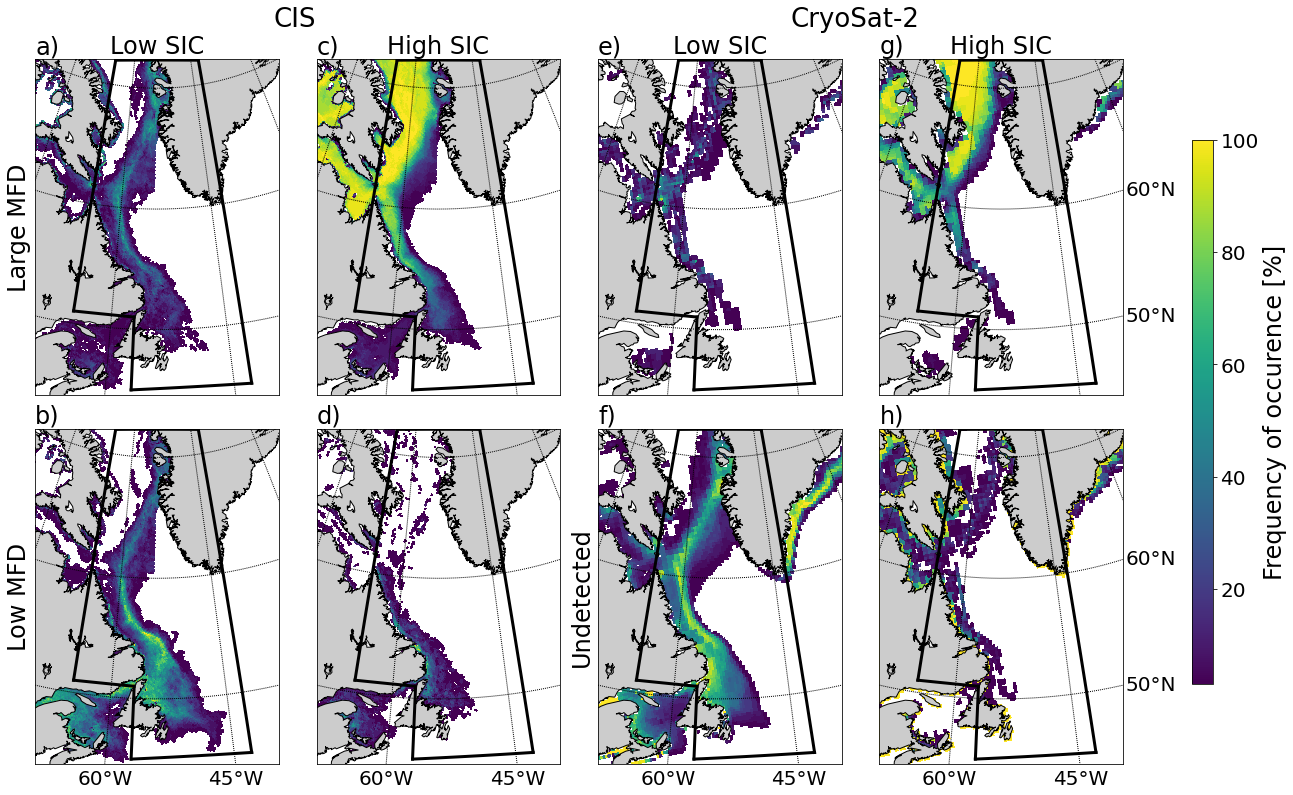

In [6]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=[18, 11])
fig.subplots_adjust(left=0.02, right=0.94, bottom=0.03, top=0.92) 
gs = GridSpec(2,6,figure=fig, hspace=0.1, wspace=0.05, width_ratios=[1, 1, 1, 1, 0.13, 0.08])

m = Basemap(width=2250000,height=3100000, resolution='l',projection='stere',\
        lat_ts=50,lat_0=58.5,lon_0=-54.)
# m = Basemap(width=1850000,height=1600000, resolution='l',projection='stere',lat_ts=50,lat_0=53,lon_0=-55.)
# m = Basemap(width=1850000,height=2500000, resolution='l',projection='stere',\
#         lat_ts=50,lat_0=58,lon_0=-55.)
x,y = m(lon_IC.values, lat_IC.values)
x_obs,y_obs = m(lon_obs.values, lat_obs.values)

#--------------------------CIS----------------------------------#

ax1 = fig.add_subplot(gs[0, 0])
plt.sca(ax1)
sc_obs = m.pcolor(x, y, cMIZndMIZ_frac, cmap='viridis')
#, norm=norm, cmap=cmap)
none_map = ListedColormap(['none'])
m.fillcontinents()
m.drawcoastlines()
# ax1.tick_params(axis="y",direction="in", pad=-22)
m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,0], size=20)
ax1.set_ylabel(r'Large MFD', size=24)
ax1.set_title(r'Low SIC', loc='center', fontsize=24)
ax1.set_title('a)', loc='left', fontsize=24)
ax1.text(0.98, 1.08, "CIS", transform=ax1.transAxes, fontsize=26, ha='left', va='bottom')
m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')


ax2 = fig.add_subplot(gs[0, 1])
plt.sca(ax2)
sc_obs = m.pcolor(x, y, ncMIZdMIZ_frac, cmap='viridis')
#, norm=norm, cmap=cmap)
none_map = ListedColormap(['none'])
m.fillcontinents()
m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,0], size=20)
ax2.set_title(r'High SIC', loc='center', fontsize=24)
ax2.set_title('c)', loc='left', fontsize=24)

m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')

ax3 = fig.add_subplot(gs[1, 0])
plt.sca(ax3)
sc_obs = m.pcolor(x, y, cMIZdMIZ_frac, cmap='viridis')
#, norm=norm, cmap=cmap)
none_map = ListedColormap(['none'])
m.fillcontinents()
m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
ax3.set_ylabel(r'Low MFD', size=24)
ax3.set_title('b)', loc='left', fontsize=24)

m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')

ax4 = fig.add_subplot(gs[1, 1])
plt.sca(ax4)
sc_obs = m.pcolor(x, y, ncMIZndMIZ_frac, cmap='viridis')
#, norm=norm, cmap=cmap)
none_map = ListedColormap(['none'])
m.fillcontinents()
m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
ax4.set_title('d)', loc='left', fontsize=24)

m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')


#--------------------------CryoSat----------------------------------#
ax1 = fig.add_subplot(gs[0, 2])
plt.sca(ax1)
sc_obs = m.pcolor(x_obs, y_obs, C2_cMIZndMIZ_frac, cmap='viridis')
#, norm=norm, cmap=cmap)
none_map = ListedColormap(['none'])
m.fillcontinents()
m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,0], size=20)
# ax1.set_ylabel("SIC-MIZ", size=24)
ax1.set_title(r'Low SIC', loc='center', fontsize=24)
ax1.set_title('e)', loc='left', fontsize=24)
ax1.text(0.79, 1.08, "CryoSat-2", transform=ax1.transAxes, fontsize=26, ha='left', va='bottom')

m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')


ax3 = fig.add_subplot(gs[1, 2])
plt.sca(ax3)
sc_obs = m.pcolor(x_obs, y_obs, C2_cMIZdMIZ_frac, cmap='viridis')
#, norm=norm, cmap=cmap)
none_map = ListedColormap(['none'])
m.fillcontinents()
m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
# ax3.set_ylabel("nSIC-MIZ", size=24)
ax3.set_ylabel(r'Undetected', size=24)
ax3.set_title('f)', loc='left', fontsize=24)

m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')

ax2 = fig.add_subplot(gs[0, 3])
plt.sca(ax2)
sc_obs = m.pcolor(x_obs, y_obs, C2_ncMIZdMIZ_frac, cmap='viridis')
#, norm=norm, cmap=cmap)
none_map = ListedColormap(['none'])
m.fillcontinents()
m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,10.),labels=[0,1,0,0], size=20) # draw parallels
m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,0], size=20)
ax2.set_title(r'High SIC', loc='center', fontsize=24)
ax2.set_title('g)', loc='left', fontsize=24)

m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')

ax4 = fig.add_subplot(gs[1, 3])
plt.sca(ax4)
sc_obs = m.pcolor(x_obs, y_obs,C2_ncMIZndMIZ_frac, cmap='viridis')
#, norm=norm, cmap=cmap)
none_map = ListedColormap(['none'])
m.fillcontinents()
m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,10.),labels=[0,1,0,0], size=20) # draw parallels
m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
ax4.set_title('h)', loc='left', fontsize=24)

m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')

cax = fig.add_subplot(gs[:,5], aspect=25)
cbar = fig.colorbar(sc_obs, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=20)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Frequency of occurence [%]', size=24)
plt.savefig('figures/labrador_CIS_Cryo2_occurence.svg',dpi='figure',format='svg',metadata=None, bbbox_inches=None)

In [4]:


# fig = plt.figure(figsize=[10, 10])
# fig.subplots_adjust(left=0.03, right=0.90, bottom=0.03, top=0.96) 
# gs = GridSpec(2,3,figure=fig, hspace=0.1, wspace=0.05, width_ratios=[1, 1, 0.08])

# m = Basemap(width=1850000,height=2500000, resolution='l',projection='stere',\
#         lat_ts=50,lat_0=58,lon_0=-55.)
# # m = Basemap(width=1850000,height=1600000, resolution='l',projection='stere',lat_ts=50,lat_0=53,lon_0=-55.)
# # m = Basemap(width=1850000,height=2500000, resolution='l',projection='stere',\
# #         lat_ts=50,lat_0=58,lon_0=-55.)
# x,y = m(lon_IC.values, lat_IC.values)

# ax1 = fig.add_subplot(gs[0, 0])
# plt.sca(ax1)
# sc_obs = m.pcolor(x, y, cMIZdMIZ_frac, cmap='viridis')
# #, norm=norm, cmap=cmap)
# none_map = ListedColormap(['none'])
# m.fillcontinents()
# m.drawcoastlines()
# m.drawparallels(np.arange(-90.,120.,10.),labels=[0,1,0,0], size=20) # draw parallels
# m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
# ax1.set_ylabel("SIC-MIZ", size=24)
# ax1.set_title('FSD-MIZ', loc='center', fontsize=24)
# ax1.set_title('a)', loc='left', fontsize=24)

# ax2 = fig.add_subplot(gs[0, 1])
# plt.sca(ax2)
# sc_obs = m.pcolor(x, y, cMIZndMIZ_frac, cmap='viridis')
# #, norm=norm, cmap=cmap)
# none_map = ListedColormap(['none'])
# m.fillcontinents()
# m.drawcoastlines()
# m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
# m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
# ax2.set_title('nFSD-MIZ', loc='center', fontsize=24)
# ax2.set_title('b)', loc='left', fontsize=24)

# ax3 = fig.add_subplot(gs[1, 0])
# plt.sca(ax3)
# sc_obs = m.pcolor(x, y, ncMIZndMIZ_frac, cmap='viridis')
# #, norm=norm, cmap=cmap)
# none_map = ListedColormap(['none'])
# m.fillcontinents()
# m.drawcoastlines()
# m.drawparallels(np.arange(-90.,120.,10.),labels=[0,1,0,0], size=20) # draw parallels
# m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
# ax3.set_ylabel("nSIC-MIZ", size=24)
# ax3.set_title('c)', loc='left', fontsize=24)

# ax4 = fig.add_subplot(gs[1, 1])
# plt.sca(ax4)
# sc_obs = m.pcolor(x, y, ncMIZdMIZ_frac, cmap='viridis')
# #, norm=norm, cmap=cmap)
# none_map = ListedColormap(['none'])
# m.fillcontinents()
# m.drawcoastlines()
# m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
# m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
# ax4.set_title('d)', loc='left', fontsize=24)

# cax = fig.add_subplot(gs[:, 2], aspect=25)
# cbar = fig.colorbar(sc_obs, cax=cax, orientation='vertical')
# cbar.ax.tick_params(labelsize=20)
# cbar.ax.tick_params(labelsize=20)
# cbar.set_label('Frequency of occurence [%]', size=24)
# plt.savefig('labrador_CIS_occurence.png',dpi='figure',format='png',metadata=None, bbbox_inches=None)

In [5]:

# fig = plt.figure(figsize=[10, 10])
# fig.subplots_adjust(left=0.03, right=0.90, bottom=0.03, top=0.96) 
# gs = GridSpec(2,3,figure=fig, hspace=0.1, wspace=0.05, width_ratios=[1, 1, 0.08])

# m = Basemap(width=1850000,height=2500000, resolution='l',projection='stere',\
#         lat_ts=50,lat_0=58,lon_0=-55.)
# # m = Basemap(width=1850000,height=1600000, resolution='l',projection='stere',lat_ts=50,lat_0=53,lon_0=-55.)
# # m = Basemap(width=1850000,height=2500000, resolution='l',projection='stere',\
# #         lat_ts=50,lat_0=58,lon_0=-55.)
# x,y = m(lon_obs.values, lat_obs.values)

# ax1 = fig.add_subplot(gs[0, 0])
# plt.sca(ax1)
# sc_obs = m.pcolor(x, y, cMIZdMIZ_frac, cmap='viridis')
# #, norm=norm, cmap=cmap)
# none_map = ListedColormap(['none'])
# m.fillcontinents()
# m.drawcoastlines()
# m.drawparallels(np.arange(-90.,120.,10.),labels=[0,1,0,0], size=20) # draw parallels
# m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
# ax1.set_ylabel("SIC-MIZ", size=24)
# ax1.set_title('FSD-MIZ', loc='center', fontsize=24)
# ax1.set_title('a)', loc='left', fontsize=24)


# ax2 = fig.add_subplot(gs[0, 1])
# plt.sca(ax2)
# sc_obs = m.pcolor(x, y, cMIZndMIZ_frac, cmap='viridis')
# #, norm=norm, cmap=cmap)
# none_map = ListedColormap(['none'])
# m.fillcontinents()
# m.drawcoastlines()
# m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
# m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
# ax2.set_title('nFSD-MIZ', loc='center', fontsize=24)
# ax2.set_title('b)', loc='left', fontsize=24)

# ax3 = fig.add_subplot(gs[1, 0])
# plt.sca(ax3)
# sc_obs = m.pcolor(x, y, ncMIZndMIZ_frac, cmap='viridis')
# #, norm=norm, cmap=cmap)
# none_map = ListedColormap(['none'])
# m.fillcontinents()
# m.drawcoastlines()
# m.drawparallels(np.arange(-90.,120.,10.),labels=[0,1,0,0], size=20) # draw parallels
# m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
# ax3.set_ylabel("nSIC-MIZ", size=24)
# ax3.set_title('c)', loc='left', fontsize=24)

# ax4 = fig.add_subplot(gs[1, 1])
# plt.sca(ax4)
# sc_obs = m.pcolor(x, y, ncMIZdMIZ_frac, cmap='viridis')
# #, norm=norm, cmap=cmap)
# none_map = ListedColormap(['none'])
# m.fillcontinents()
# m.drawcoastlines()
# m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
# m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20)
# ax4.set_title('d)', loc='left', fontsize=24)

# cax = fig.add_subplot(gs[:, 2], aspect=25)
# cbar = fig.colorbar(sc_obs, cax=cax, orientation='vertical')
# cbar.ax.tick_params(labelsize=20)
# cbar.ax.tick_params(labelsize=20)
# cbar.set_label('Frequency of occurence [%]', size=24)
# plt.savefig('labrador_Cryo2_occurence.png',dpi='figure',format='png',metadata=None, bbbox_inches=None)